In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from random import randrange, uniform
from scipy.stats import chi2_contingency
from fancyimpute import KNN

Using TensorFlow backend.


In [2]:
os.chdir ('C:/Users/Harshita Prasad/Desktop/loan default case')

In [3]:
original_data = pd.read_csv("bank-loan.csv", sep = ',')
df = original_data

In [4]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [5]:
df = df.rename(columns = {'ed':'education','employ':'employstatus','othdebt':'otherdebt'})

In [6]:
df.dtypes

age               int64
education         int64
employstatus      int64
address           int64
income            int64
debtinc         float64
creddebt        float64
otherdebt       float64
default         float64
dtype: object

In [7]:
df.describe()

,age,education,employstatus,address,income,debtinc,creddebt,otherdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [8]:
numerical_var = ['age', 'employstatus', 'address', 'income', 'debtinc', 'creddebt', 'otherdebt']

In [9]:
categorical_var=['education', 'default']

In [10]:
df['education'] = df['education'].astype(object)
df['default'] = df['default'].astype(object)

In [11]:
df.dtypes

age               int64
education        object
employstatus      int64
address           int64
income            int64
debtinc         float64
creddebt        float64
otherdebt       float64
default          object
dtype: object

Text(0.5, 0.98, 'Pairwise plot of all numerical variables')

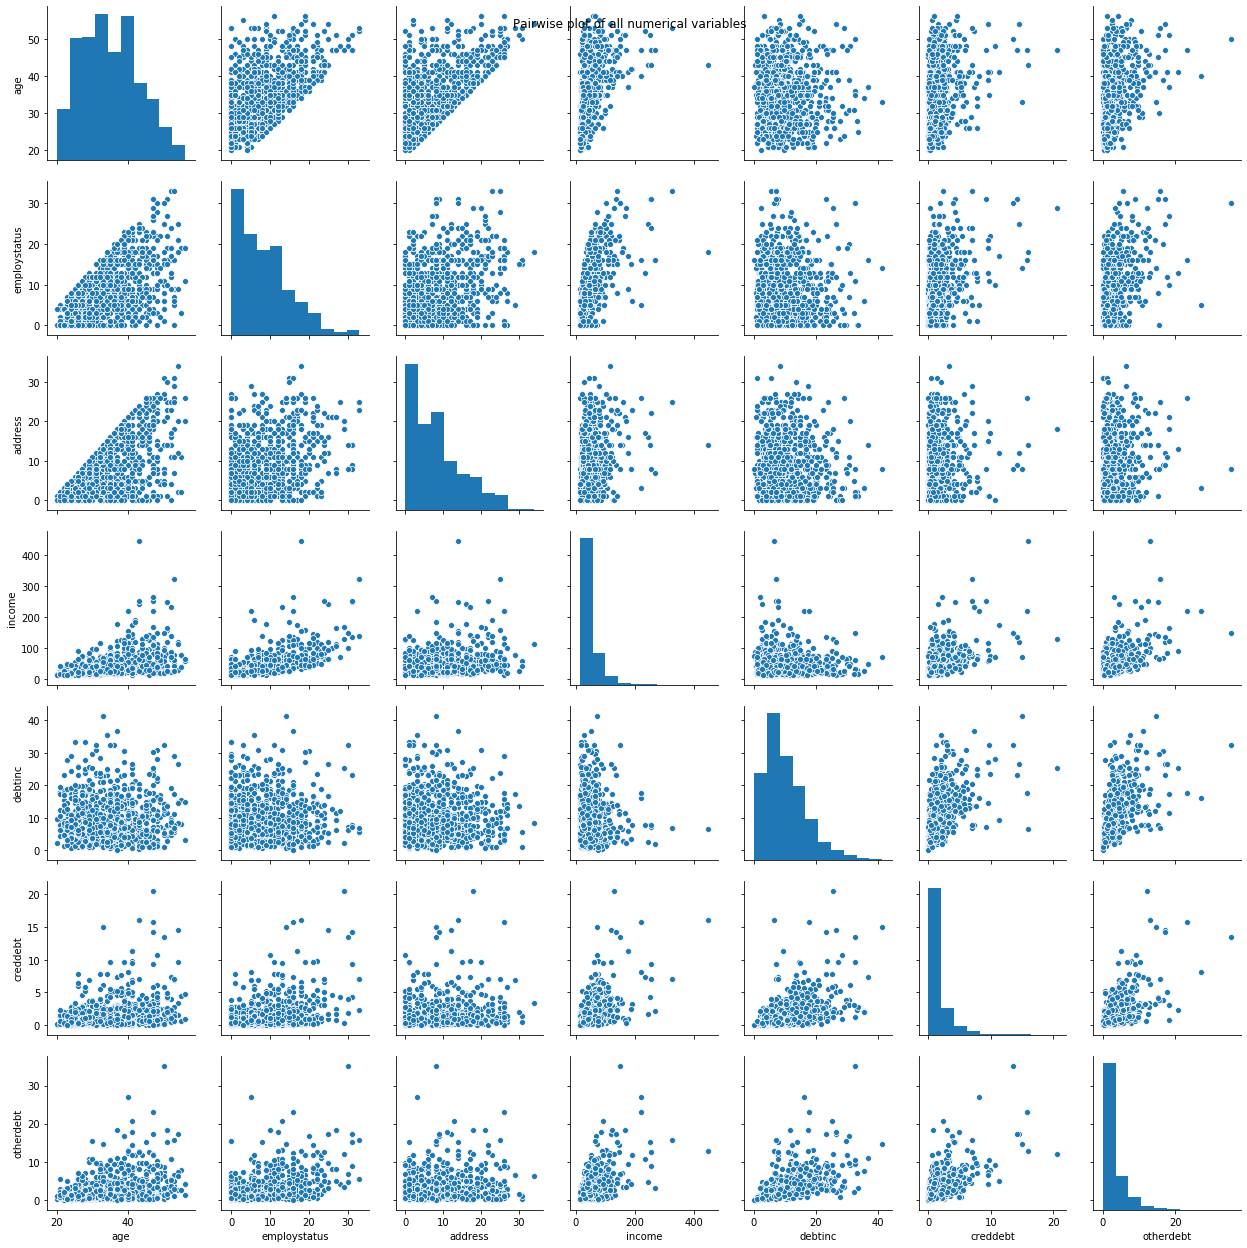

In [12]:
#Pairplot for all numerical variables
pairwise_plot = sns.pairplot(data=df[numerical_var],kind='scatter')
pairwise_plot.fig.suptitle('Pairwise plot of all numerical variables')

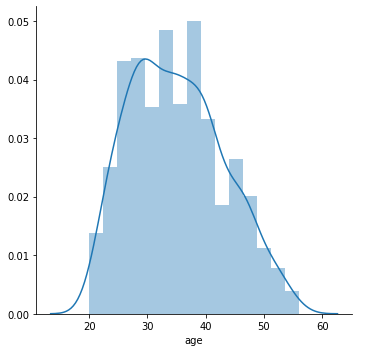

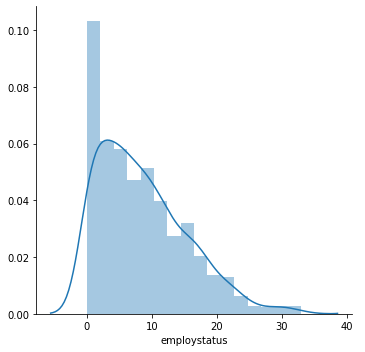

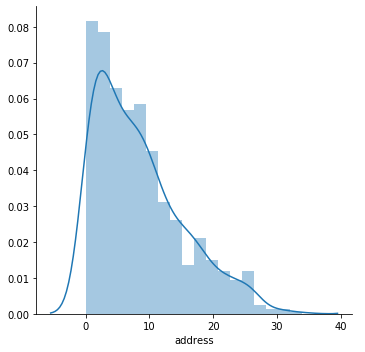

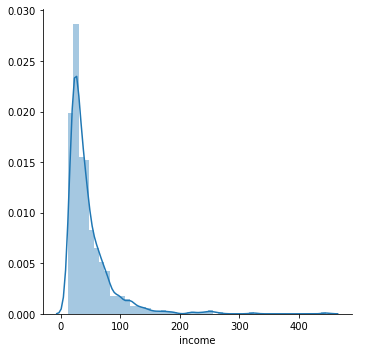

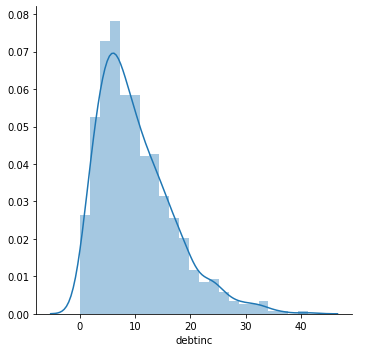

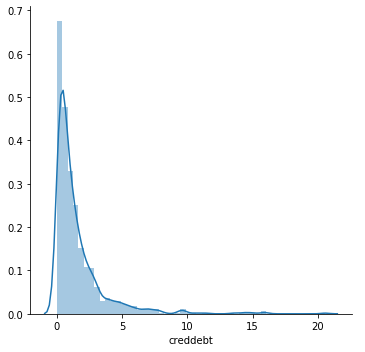

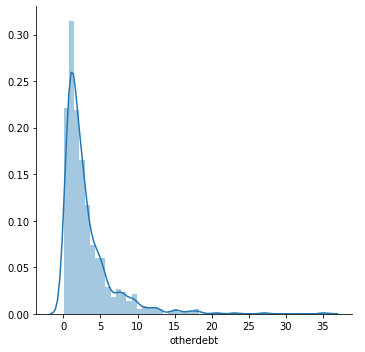

In [13]:
# Univariate Analysis
sns.FacetGrid(df , height = 5).map(sns.distplot,'age').add_legend()
sns.FacetGrid(df , height = 5).map(sns.distplot,'employstatus').add_legend()
sns.FacetGrid(df , height = 5).map(sns.distplot,'address').add_legend()
sns.FacetGrid(df , height = 5).map(sns.distplot,'income').add_legend()
sns.FacetGrid(df , height = 5).map(sns.distplot,'debtinc').add_legend()
sns.FacetGrid(df , height = 5).map(sns.distplot,'creddebt').add_legend()
sns.FacetGrid(df , height = 5).map(sns.distplot,'otherdebt').add_legend()

In [14]:
#Missing value analysis
Missing_val = df.isnull().sum()
Missing_val

age               0
education         0
employstatus      0
address           0
income            0
debtinc           0
creddebt          0
otherdebt         0
default         150
dtype: int64

In [15]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Missing_perc.csv", index = False)

In [16]:
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 1).fit_transform(df), columns = df.columns)

Imputing row 1/850 with 0 missing, elapsed time: 0.152
Imputing row 101/850 with 0 missing, elapsed time: 0.153
Imputing row 201/850 with 0 missing, elapsed time: 0.154
Imputing row 301/850 with 0 missing, elapsed time: 0.154
Imputing row 401/850 with 0 missing, elapsed time: 0.155
Imputing row 501/850 with 0 missing, elapsed time: 0.155
Imputing row 601/850 with 0 missing, elapsed time: 0.156
Imputing row 701/850 with 1 missing, elapsed time: 0.156
Imputing row 801/850 with 1 missing, elapsed time: 0.161


In [17]:
df.isnull().sum()

age             0
education       0
employstatus    0
address         0
income          0
debtinc         0
creddebt        0
otherdebt       0
default         0
dtype: int64

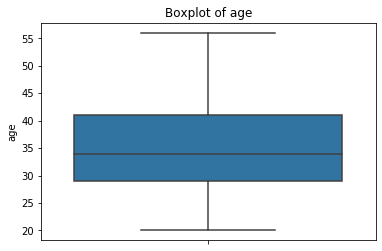

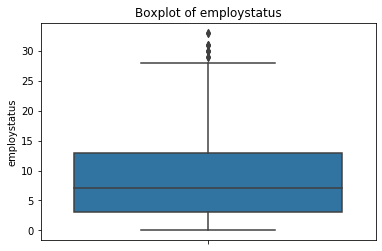

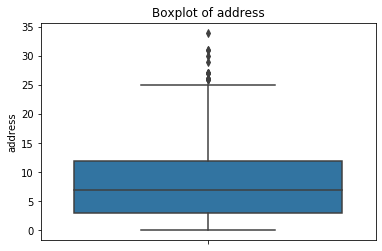

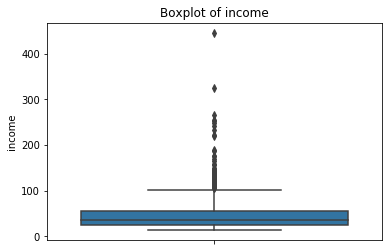

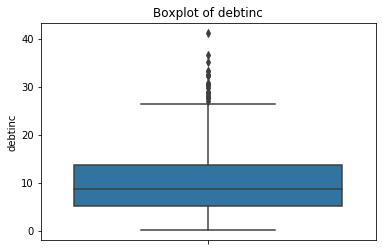

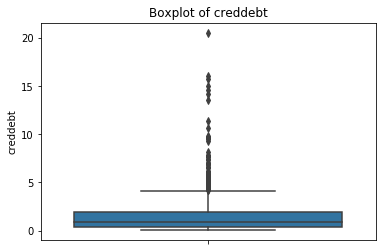

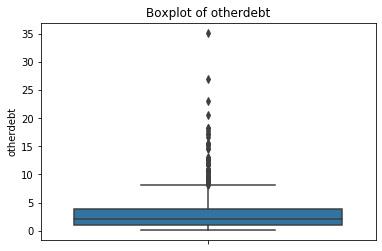

In [18]:
#Box plot
for i in numerical_var:
    sns.boxplot(y=i,data=df)
    plt.title('Boxplot of '+i)
    plt.savefig('bp'+str(i)+'.png')
    plt.show()

In [19]:
##Outlier Analysis
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(df[col], [75 ,25])
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    #Replace with NA
    df.loc[df[col] < minimum,col] = np.nan
    df.loc[df[col] > maximum,col] = np.nan

In [20]:
outlier_treatment('employstatus')
outlier_treatment('address')
outlier_treatment('income')
outlier_treatment('debtinc')
outlier_treatment('creddebt')
outlier_treatment('otherdebt')

In [21]:
#Imputing with missing values using KNN
df = pd.DataFrame(KNN(k = 1).fit_transform(df), columns = df.columns, index=df.index)

Imputing row 1/850 with 2 missing, elapsed time: 0.232
Imputing row 101/850 with 1 missing, elapsed time: 0.234
Imputing row 201/850 with 0 missing, elapsed time: 0.235
Imputing row 301/850 with 4 missing, elapsed time: 0.236
Imputing row 401/850 with 0 missing, elapsed time: 0.238
Imputing row 501/850 with 0 missing, elapsed time: 0.240
Imputing row 601/850 with 0 missing, elapsed time: 0.241
Imputing row 701/850 with 0 missing, elapsed time: 0.243
Imputing row 801/850 with 0 missing, elapsed time: 0.244


In [22]:
df.isnull().sum()

age             0
education       0
employstatus    0
address         0
income          0
debtinc         0
creddebt        0
otherdebt       0
default         0
dtype: int64

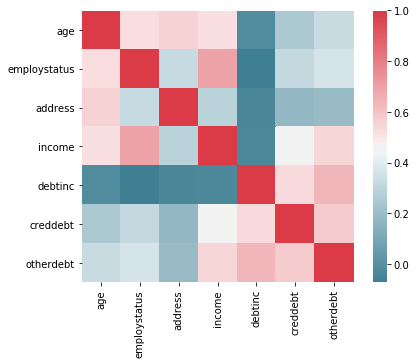

In [23]:
##Correlation analysis
#Correlation plot
df_corr = df.loc[:,numerical_var]

#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [24]:
#Chisquare test of independence
#loop for chi square values
for i in categorical_var:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['default'], df[i]))
    print(p)

#if p<0.05, reject the null hypothesis i.e dont take the variable. 

education
0.020880985212350878
default
1.015729287885286e-185


In [25]:
#Nomalisation
for i in numerical_var:
    print(i)
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

age
employstatus
address
income
debtinc
creddebt
otherdebt


In [26]:
df.describe()

,age,education,employstatus,address,income,debtinc,creddebt,otherdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,0.417484,1.710588,0.298361,0.321835,0.317409,0.362963,0.283138,0.310713,0.254118
std,0.223373,0.927784,0.229239,0.255330,0.246212,0.223040,0.241728,0.244970,0.435620
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,1.000000,0.107143,0.120000,0.123596,0.189394,0.088620,0.122800,0.000000
50%,0.388889,1.000000,0.250000,0.280000,0.247191,0.320076,0.207924,0.239346,0.000000
75%,0.583333,2.000000,0.455357,0.480000,0.460674,0.500000,0.415319,0.445960,1.000000
max,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.iloc[:10,:9]

,age,education,employstatus,address,income,debtinc,creddebt,otherdebt,default
0,0.583333,3.0,0.607143,0.48,0.741573,0.348485,0.614609,0.611684,1.0
1,0.194444,1.0,0.357143,0.24,0.202247,0.651515,0.325556,0.487474,0.0
2,0.555556,1.0,0.535714,0.56,0.471910,0.204545,0.203548,0.261698,0.0
3,0.583333,1.0,0.535714,0.56,0.674157,0.106061,0.638098,0.095603,0.0
4,0.111111,2.0,0.071429,0.00,0.168539,0.651515,0.428064,0.371098,1.0
5,0.583333,2.0,0.178571,0.20,0.134831,0.382576,0.091846,0.260265,0.0
6,0.527778,1.0,0.714286,0.36,0.606742,0.151515,0.921383,0.304465,0.0
7,0.638889,1.0,0.428571,0.44,0.280899,0.132576,0.028179,0.147137,0.0
8,0.111111,1.0,0.107143,0.16,0.067416,0.920455,0.324627,0.398347,1.0
9,0.444444,1.0,0.000000,0.52,0.134831,0.742424,0.666779,0.259033,0.0


In [28]:
df.dtypes

age             float64
education       float64
employstatus    float64
address         float64
income          float64
debtinc         float64
creddebt        float64
otherdebt       float64
default         float64
dtype: object

In [29]:
#Divide data into train and test
X = df.values[:, 0:8]
Y = df.values[:,8]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [30]:
#Create logistic data. Save target variable first
df_logit = pd.DataFrame(df['default'])

#Add continous variables
df_logit = df_logit.join(df[numerical_var])

In [31]:
df_logit.head()

,default,age,employstatus,address,income,debtinc,creddebt,otherdebt
0,1.0,0.583333,0.607143,0.48,0.741573,0.348485,0.614609,0.611684
1,0.0,0.194444,0.357143,0.24,0.202247,0.651515,0.325556,0.487474
2,0.0,0.555556,0.535714,0.56,0.471910,0.204545,0.203548,0.261698
3,0.0,0.583333,0.535714,0.56,0.674157,0.106061,0.638098,0.095603
4,1.0,0.111111,0.071429,0.00,0.168539,0.651515,0.428064,0.371098


In [32]:
##Create dummies for categorical variables
cat_var = ["education"]

for i in cat_var:
    temp = pd.get_dummies(df[i], prefix = i)
    df_logit = df_logit.join(temp)

In [33]:
Sample_Index = np.random.rand(len(df_logit)) < 0.8

train = df_logit[Sample_Index]
test = df_logit[~Sample_Index]

In [34]:
df_logit.shape

(850, 13)

In [35]:
#select column indexes for independent variables
train_cols = train.columns[1:13]

In [36]:
np.asarray(df)

array([[0.58333333, 3.        , 0.60714286, ..., 0.61460877, 0.61168443,
        1.        ],
       [0.19444444, 1.        , 0.35714286, ..., 0.32555618, 0.48747353,
        0.        ],
       [0.55555556, 1.        , 0.53571429, ..., 0.203548  , 0.26169824,
        0.        ],
       ...,
       [0.77777778, 1.        , 0.46428571, ..., 0.17130085, 0.41117024,
        0.        ],
       [0.41666667, 2.        , 0.03571429, ..., 0.09781347, 0.17365197,
        0.        ],
       [0.47222222, 1.        , 0.71428571, ..., 0.21392694, 0.53542601,
        0.        ]])

In [37]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['default'], train[train_cols]).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.418688
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  685
Model:                          Logit   Df Residuals:                      673
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Feb 2020   Pseudo R-squ.:                  0.2506
Time:                        10:36:18   Log-Likelihood:                -286.80
converged:                       True   LL-Null:                       -382.71
Covariance Type:            nonrobust   LLR p-value:                 3.701e-35
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.8532      0.602      1.417      0.156      -0.327       2.033
employstatus     -4.6349      0.824     -5.626      0.000      -6.250      -3.020
address          -2.9426      0.595     -4.943      0.000      -4.109      -1.776
income           -1.6392      0.935     -1.753      0.080      -3.472       0.193
debtinc           1.4535      0.796      1.826      0.068      -0.107       3.014
creddebt          2.8350      0.658      4.310      0.000       1.546       4.124
otherdebt         1.3927      0.832      1.675      0.094      -0.237       3.023
education_1.0    -1.0819      0.327     -3.307      0.001      -1.723      -0.441
education_2.0    -0.7022      0.350     -2.006      0.045      -1.389      -0.016
education_3.0    -0.6963      0.431     -1.617      0.106      -1.540       0.148
education_4.0    -1.2110      0.542     -2.234      0.025      -2.273      -0.149
education_5.0    -0.6192      1.264     -0.490      0.624      -3.096       1.858
=================================================================================
"""

In [38]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

C:\Users\Harshita Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

C:\Users\Harshita Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Harshita Prasad\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
#Build confusion matrix
CM = pd.crosstab(test['default'], test['ActualVal'])

In [41]:
#check accuracy of model
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

75.75757575757575

In [42]:
#false negative rate
(FN*100)/(FN+TP)

63.829787234042556

Area Under Curve: 0.59


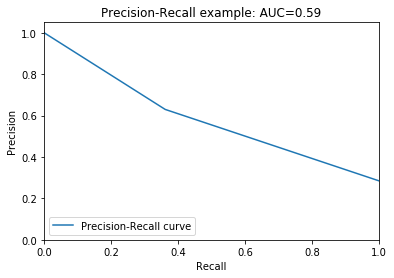

In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import pylab as pl

# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(test['default'], test['ActualVal'])
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [44]:
##Decision tree
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [45]:
#replace target categories with Yes or No
df['default'] = df['default'].replace(0, 'No')
df['default'] = df['default'].replace(1, 'Yes')

In [46]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [47]:
#build confusion matrix
from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(y_test, C50_Predictions)

In [48]:
CM = pd.crosstab(y_test, C50_Predictions)
CM

col_0,0.0,1.0
row_0,,
0.0,97,28
1.0,30,15


In [49]:
#check accuracy of model
accuracy_score(y_test, C50_Predictions)*100

65.88235294117646

In [50]:
    #False Negative rate 
    (FN*100)/(FN+TP)

63.829787234042556

Area Under Curve: 0.43


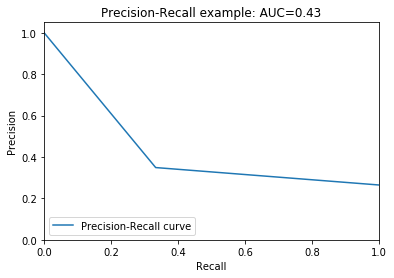

In [51]:
# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y_test, C50_Predictions)
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [52]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)

In [53]:
RF_Predictions = RF_model.predict(X_test)

In [54]:
#build confusion matrix
CM = confusion_matrix(y_test, RF_Predictions)
CM = pd.crosstab(y_test, RF_Predictions)
CM

col_0,0.0,1.0
row_0,,
0.0,115,10
1.0,31,14


In [55]:
#check accuracy of model
accuracy_score(y_test, RF_Predictions)*100

75.88235294117646

In [56]:
#False Negative rate 
(FN*100)/(FN+TP)

63.829787234042556

Area Under Curve: 0.54


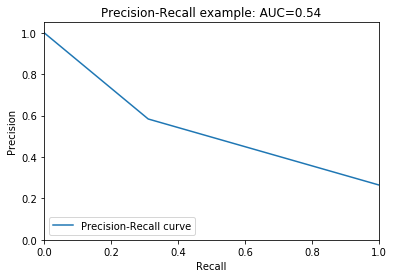

In [57]:
# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y_test, RF_Predictions)
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [58]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

In [59]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [60]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

In [61]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

75.75757575757575

In [62]:
#False Negative rate 
(FN*100)/(FN+TP)

63.829787234042556

Area Under Curve: 0.50


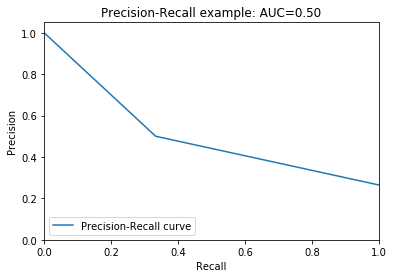

In [63]:
# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y_test, KNN_Predictions)
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [64]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [65]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [66]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

In [67]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

75.75757575757575

In [68]:
#False Negative rate 
(FN*100)/(FN+TP)

63.829787234042556

Area Under Curve: 0.66


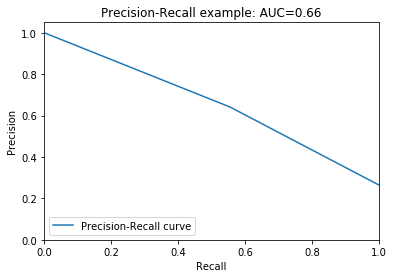

In [69]:
# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y_test, NB_Predictions)
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()